In [21]:
import geoplotlib as gpl
from geoplotlib.utils import read_csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import mpld3

mpld3.enable_notebook()

In [2]:
def state_urban(df, state):
    new = df[df.land_use_name == "Urban"]
    new = new[new.state_name == state]
    
    return new

def state_rural(df, state):
    new = df[df.land_use_name == "Rural"]
    new = new[new.state_name == state]
    
    return new
def valid_latlon(x):
    '''Checks if latitude and longitude data are valid'''
    if (-90 < x.lat < 90) & (-180 < x.lon < 180):
        return True
    else:
        return False
def check_lat_lon(df):
    '''Creates a column to describe if the latitude and longitude data are valid (True)
        or invalid (False)'''
    df['valid_latlon'] = df.apply(lambda x: valid_latlon(x), axis=1)
    print("Number of invalid lat/lon found: ", len(df[df.valid_latlon == False]))

def make_heatmaps(gpl_dao, country='USA', cmap='hot'):
    if country == 'USA':
        bbox = gpl.utils.BoundingBox(71.3577635769, -171.791110603, 18.91619, -66.96466)
    gpl.kde(gpl_dao, bw=[2,2], cmap=cmap, cut_below=1e-6)
    if bbox:
        gpl.set_bbox(bbox)
    gpl.set_window_size(800, 600)
    gpl.show()
    
def save_rural_urban_heatmaps(df, year):
    '''Given a pandas dataframe, will create a geoplotlib heatmap for rural and urban
    records.
    Parameters:
    df(pandas DataFrame): pandas dataframe containing column "land_use_name" with Rural and Urban records
    year (int): the year that the data represents, used for filename
    
    Output:
    2 pngs will be saved with the format '[year]_[urban/rural]heatmap.png'.
    '''
    proceed = 'N'
    rural_data = gpl.utils.DataAccessObject(df[df.land_use_name == "Rural"])
    urban_data = gpl.utils.DataAccessObject(df[df.land_use_name == "Urban"])
    make_heatmaps(rural_data)
    while proceed == 'N':
        proceed = input("OK to proceed (Y/N)?").capitalize()
    gpl.close()
    pyglet.app.exit()
    proceed = 'N'
    make_heatmaps(urban_data)
    while proceed == 'N':
        proceed = input("OK to proceed (Y/N)?").capitalize() 

In [3]:
#Import and set up data
data_2016 = pd.read_csv('accidents_2016.csv', index_col=0)
data_2015 = pd.read_csv('accidents_2015.csv', index_col=0)
data_2016.rename(columns={'latitude': 'lat', 'longitude': 'lon'},\
                 inplace=True)
data_2015.rename(columns={'latitude': 'lat', 'longitude': 'lon'},\
                inplace=True)

check_lat_lon(data_2016)
check_lat_lon(data_2015)

#Remove records with invalid location data
data_2016 = data_2016[data_2016.valid_latlon == True]
data_2015 = data_2015[data_2015.valid_latlon == True]

Number of invalid lat/lon found:  129
Number of invalid lat/lon found:  142


In [4]:
print("2016 valid: ", len(data_2016) + 129)
print((129 / (len(data_2016) + 129))*100, "%")
print("2015 valid: ", len(data_2015) + 142)
print((142 / (len(data_2015) + 142))*100, "%")

2016 valid:  34748
0.3712443881662254 %
2015 valid:  32538
0.4364128096379618 %


In [ ]:
#Create 2016 and 2015 geo maps
geodata_2016 = gpl.utils.DataAccessObject(data_2016)
geodata_2015 = gpl.utils.DataAccessObject(data_2015)

make_heatmaps(geodata_2016)

In [ ]:
make_heatmaps(geodata_2015)

In [ ]:
#Create rural heatmaps for 2015 & 2016
rural2016 = data_2016[data_2016.land_use_name == 'Rural']
rural2016 = gpl.utils.DataAccessObject(rural2016)
make_heatmaps(rural2016)

In [ ]:
rural2015 = data_2015[data_2015.land_use_name == 'Rural']
rural2015 = gpl.utils.DataAccessObject(rural2015)
make_heatmaps(rural2015)

In [ ]:
#Create urban heatmaps for 2015 & 2016
urban2016 = data_2016[data_2016.land_use_name == 'Urban']
urban2016 = gpl.utils.DataAccessObject(urban2016)
make_heatmaps(urban2016)

In [ ]:
urban2015 = data_2015[data_2015.land_use_name == 'Urban']
urban2015 = gpl.utils.DataAccessObject(urban2015)
make_heatmaps(urban2015)

In [4]:
HI_urban2016 = state_urban(data_2016, "Hawaii")
HI_rural2016 = state_rural(data_2016, "Hawaii")
FL_urban2016 = state_urban(data_2016, "Florida")
FL_rural2016 = state_rural(data_2016, "Florida")
CA_urban2016 = state_urban(data_2016, "California")
CA_rural2016 = state_rural(data_2016, "California")
DE_urban2016 = state_urban(data_2016, "Delaware")
DE_rural2016 = state_rural(data_2016, "Delaware")
DC_urban2016 = state_urban(data_2016, "District of Columbia")
DC_rural2016 = state_rural(data_2016, "District of Columbia")

In [5]:
top5 = {"DC": [DC_urban2016, DC_rural2016, [38.9955, -77.1198, 38.7917, -76.9095]],\
       "DE": [DE_urban2016, DE_rural2016, [39.88, -75.7890472412109, 38.40, -74.9846343994141]],\
       "CA": [CA_urban2016, CA_rural2016, [42.0095024108887, -124.482009887695, 32.5295219421387, -114.13077545166]],\
       "FL": [FL_urban2016, FL_rural2016, [31.0009689331055, -87.6349029541016, 24.3963069915771, -79.9743041992188]],\
       "HI": [HI_urban2016, HI_rural2016,[22.2356, -160.2471, 18.9117, -154.8066]]}

**Delaware**
N: 39.8394355773926
S: 38.4511260986328
W: -75.7890472412109
E: -74.9846343994141

**California**
N: 42.0095024108887
S: 32.5295219421387
W:-124.482009887695
E: -114.13077545166

**Florida**
N: 31.0009689331055
S: 24.3963069915771
W: -87.6349029541016
E: -79.9743041992188

**Hawaii**
N: 22.2356
S: 18.9117
W: -160.2471
E: -154.8066

**DC**
N: 38.9955
S: 38.7917
W: -77.1198
E: -76.9095

In [ ]:
for s in top5:
    coordinates = top5[s][2]
    bbox = gpl.utils.BoundingBox(coordinates[0], coordinates[1], coordinates[2], coordinates[3])
    urbangeo = gpl.utils.DataAccessObject(top5[s][0])
    ruralgeo = gpl.utils.DataAccessObject(top5[s][1])
    #gpl.kde(ruralgeo, bw=[2,2], cmap='Oranges', cut_below=1e-6)
    #gpl.kde(urbangeo, bw=[2,2], cmap='Purples', cut_below=1e-6)
    gpl.dot(ruralgeo, color="b", point_size=6)
    gpl.dot(urbangeo, color="g", point_size=6)
    gpl.set_bbox(bbox)
    gpl.set_window_size(800, 600)
    gpl.show()
    
    

In [ ]:
?gpl.utils.BoundingBox


In [30]:
?gpl.dot


In [16]:
?plt.bar

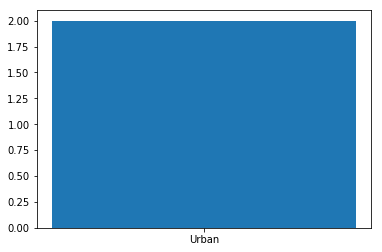

In [19]:
fig, ax = plt.subplots(1,1)
urbanfat = ax.bar("Urban", DC_urban2016.number_of_fatalities)

In [31]:
df = pd.DataFrame(data_2016.groupby(['state_name', 'land_use_name'])['number_of_fatalities'].sum())
states = ['California', 'Delaware', 'District of Columbia', 'Hawaii', 'Florida']
df

number_of_fatalities
state_name           land_use_name                                          
Alabama              Rural                                               801
                     Urban                                               280
Alaska               Rural                                                53
                     Trafficway Not in State Inventory                     1
                     Urban                                                30
Arizona              Rural                                               314
                     Urban                                               605
Arkansas             Rural                                               366
                     Urban                                               195
California           Rural                                              1592
                     Urban                                              2242
Colorado             Rural                                               266
                     Urban                                               342
Connecticut          Rural                                                37
                     Trafficway Not in State Inventory                     6
                     Urban                                               261
Delaware             Rural                                                69
                     Urban                                                50
District of Columbia Unknown                                               1
                     Urban                                                26
Florida              Rural                                               870
                     Trafficway Not in State Inventory                    31
                     Urban                                              2275
Georgia              Rural                                               603
                     Urban                                               951
Hawaii               Rural                                                24
                     Trafficway Not in State Inventory                     1
                     Urban                                                94
Idaho                Rural                                               194
                     Trafficway Not in State Inventory                    12
...                                                                      ...
Rhode Island         Rural                                                10
                     Urban                                                41
South Carolina       Rural                                               613
                     Urban                                               405
South Dakota         Rural                                               103
                     Urban                                                13
Tennessee            Rural                                               465
                     Trafficway Not in State Inventory                     4
                     Urban                                               568
Texas                Rural                                              1590
                     Trafficway Not in State Inventory                     2
                     Urban                                              2205
Utah                 Rural                                               121
                     Urban                                               160
Vermont              Rural                                                52
                     Urban                                                10
Virginia             Rural                                               477
                     Unknown                                               2
                     Urban                                               281
Washington           Rural                          